# 第4章 朴素贝叶斯
1. 朴素贝叶斯是典型的生成学习方法，由训练数据学习联合分布概率$p(X,Y)$,然后求的后验概率$p(y|x)$。具体为利用训练数据学习$p(X|Y)和p(Y)$,得到联合概率分布：
$$p(X,Y)=p(Y)p(X|Y)$$
概率估计方法可以是极大似然估计，也可以是贝叶斯估计
2. 朴素贝叶斯的基本假设是独立同分布：
$$P(X=x|Y=c_k)=P(X=x^1,X=x^2,···,X=x^n|Y=c_k)=\prod_{j=1}^n P(X=x^j|Y=c_k)$$
3. 朴素贝叶斯利用贝叶斯定理学到的联合概率模型进行分类预测：
$$P(Y|X)=\frac{P(X,Y)}{P(X)} = \frac{P(Y)P(X|Y)}{\sum_Y P(Y)P(X|Y)}$$
输入x后得到后验概率最大的分类y
4. 常用模型
    - 高斯朴素贝叶斯
    - 伯努利朴素贝叶斯
    - 多项式朴素贝叶斯


## 高斯朴素贝叶斯
假设特征的分布符合高斯分布：
$$P(x_i|y_j)服从高斯分布$$

In [1]:
import math
import numpy as np
from collections import Counter

In [21]:
class GaussianNB:
    """ 高斯朴素贝叶斯分类器 """
    def __init__(self):
        """
        paramters：
            n_calss 类别数量
            avgs 每个特征的期望
            vars 数据集中每个样本的方差
            prior 所属类别的先验概率
        """
        self.n_class = None    
        self.avgs = None
        self.vars = None
        self.prior = None

    def _get_prior(self, targets):
        """
        计算先验概率
        targets: 样本的标签
        """
        target_size = len(targets)     # 样本标签数量
        target_count = Counter(targets)
        # 计算每个类别的先验概率
        prior = np.array(
            [target_count[i] / target_size for i in target_count]
        )
        return prior

    def _get_avgs(self, data, target):
        """
        计算训练样本均值，每个类别中的每个特征分别计算
        target == i 找到每个类别标签的索引，取出对应的特征数据
        """
        return np.array(
            [data[target == i].mean(axis=0) for i in range(self.n_class)]
        )

    def _get_vars(self, data, target):
        """ 计算训练样本方差，每个类别中的每个特征的方差 """
        return np.array(
            [data[target == i].var(axis=0) for i in range(self.n_class)]
        )

    def _get_factor(self, row):
        """ 根据高斯公式计算似然概率值 """
        return ((1 / (self.vars * np.sqrt(2 * np.pi))) * np.exp(
            (-(row - self.avgs) ** 2) / (2 * self.vars ** 2)
        )).prod(axis=1)

    def fit(self, data: np.array, target: np.array):
        self.prior = self._get_prior(target)
        self.n_class = len(self.prior)
        self.avgs = self._get_avgs(data, target)
        self.vars = self._get_vars(data, target)

    def prodict_proba(self, data):
        """ 先验概率乘以调整因子，得到后验概率 """
        factors = np.apply_along_axis(
            lambda x: self._get_factor(x), axis=1, arr=data)
        probs = self.prior * factors

        # 归一化
        probs_sum = probs.sum(axis=1)
        return probs / probs_sum[:, None]

    def prodict(self, data):
        return self.prodict_proba(data).argmax(axis=1)
    
    def score(self, x_test, y_test):
        y_pro = self.prodict(x_test)
        return np.mean(y_pro == y_test)

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

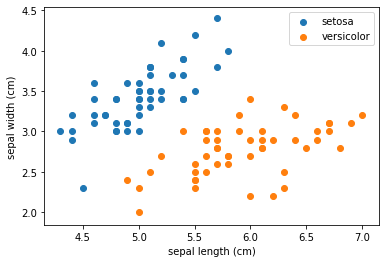

In [7]:
iris = load_iris()
x = iris.data[:100, :2]
y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=9)

# 画图
plt.scatter(x[:50, 0], x[:50, 1], label=iris.target_names[0])
plt.scatter(x[50:100, 0], x[50:100, 1], label=iris.target_names[1])
# plt.scatter(x[100:150, 0], x[100:150, 1], label=iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [22]:
clf = GaussianNB()
clf.fit(x_train, y_train)

In [13]:
y_pro = clf.prodict(x_test)

In [24]:
clf.score(x_train, y_train)

0.975